In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import math

from gensim import corpora
from gensim import models

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# PART 1 : TEXT

## LDA on negative feedbacks

In [4]:
df_text=pd.read_pickle('data/df_text_negative_preprocessed')

In [5]:
dictionary = corpora.Dictionary(df_text['preprocessed_items'])

In [6]:
bow_corpus = [dictionary.doc2bow(text) for text in df_text['preprocessed_items']]

In [7]:
lda_model = models.LdaModel(bow_corpus, id2word=dictionary, num_topics=15, minimum_probability=0)

In [8]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning) 

import pyLDAvis

In [9]:
from pyLDAvis import gensim

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
vis_data = gensim.prepare(lda_model,bow_corpus,dictionary=dictionary)

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
pyLDAvis.display(vis_data)

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word Cloud Representation of topics after LDA

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


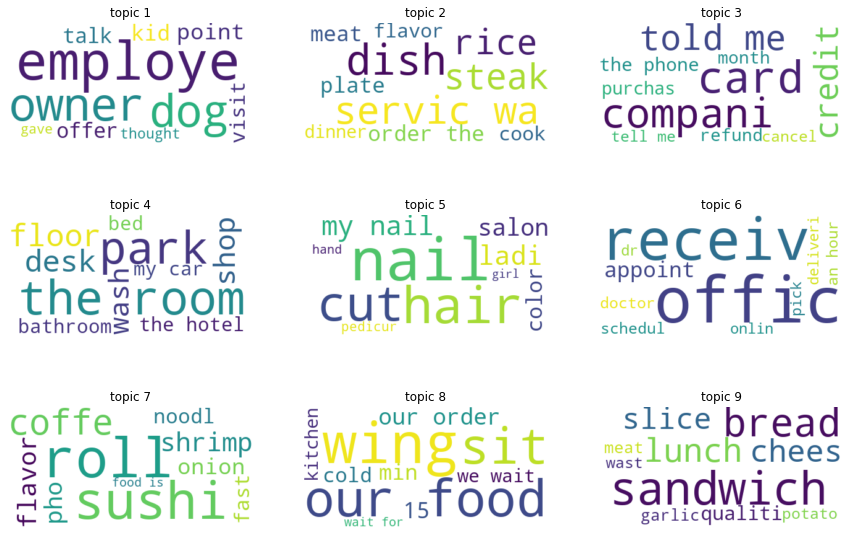

In [12]:
topic_order = vis_data.topic_order[0:9]
import wordcloud
cloud = wordcloud.WordCloud(background_color='white')

fig, axs = plt.subplots(3, 3, figsize=(15, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

i=0
for topic_id in topic_order:
    plt.subplot(axs[i]) 
    cloud.fit_words(dict(lda_model.show_topic(topic_id-1)))
    axs[i].imshow(cloud, interpolation='bilinear',)
    axs[i].axis("off")
    plt.title(f'topic {i+1}')
    i+=1

# PART 2 : IMAGE

## T-SNE representation of the image corpus

C:\Users\Soyann\Code\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


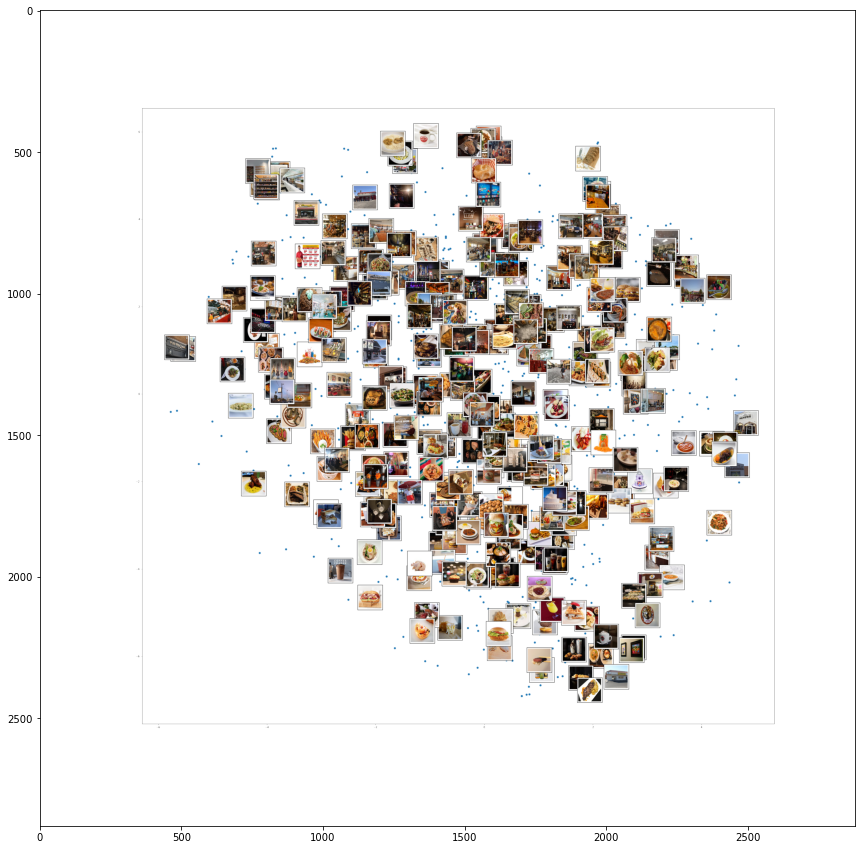

In [22]:
plt.figure(figsize=(15,15))
img = mpimg.imread('data/r.png')
imgplot = plt.imshow(img)
plt.show()